In [70]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

import matplotlib
from matplotlib import font_manager 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica') 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import the relevant packages

In [2]:
from weighted_evo import *
from bct import community_louvain

In [19]:
from weighted_evo import *
dev_Gs, strategies = parallel_mc(500, 0.02, np.array([2., -0.5, 3, 0.5]), 
                                 1., 0.1, 5000, 10)

In [20]:
strategies.shape

(10, 100, 500, 2)

In [23]:
np.all(strategies[0] == strategies[8])

False

This is the code we run to generate the data for the project, sweeping the $p$ and $b$ parameter spaces and running 5 million MC steps at each for 10 different random graphs

In [3]:
from weighted_evo import *
p_vals = np.array([0.02, 0.05, 0.1, 0.15])
b_vals = np.array([0., 0.5, 1.0, 1.5, 2.0])
for p in p_vals:
    for b in tqdm_notebook(b_vals):
        payoffs = np.array([2., -1.5 + b, 3, -0.5 + b])
        dev_Gs, strategies = parallel_mc(500, p, payoffs, 1., 0.1,
                                         2000000, 10)
        np.save('p_{}_b_{}_dev_Gs.npy'.format(p, b), dev_Gs)
        np.save('p_{}_b_{}_strats.npy'.format(p, b), strategies)

In [7]:
modularities[0, 0]

array([[0.23716941, 0.10918271],
       [0.23657304, 0.10503368],
       [0.24104641, 0.10450447],
       [0.24755181, 0.11342528],
       [0.25111547, 0.09656154],
       [0.24358235, 0.0946163 ],
       [0.23655448, 0.11474949],
       [0.23845824, 0.1175103 ],
       [0.24833516, 0.10714342],
       [0.2380565 , 0.09711863]])

In [22]:
from bct import community_louvain
modularities = np.zeros((4, 5, 10, 2))
modularities_cc = np.zeros((4, 5, 10, 2))
n_cc_nodes = np.zeros((4, 5, 10))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        for k in range(dev_Gs.shape[0]):
            ER_G = nx.from_numpy_array(dev_Gs[k, 0])
            real_G = nx.from_numpy_array(dev_Gs[k, 1])
            Gc = max(nx.connected_component_subgraphs(real_G), key=len)
            n_cc_nodes[i, j, k] = len(Gc.nodes())
            nodes = np.array(list(Gc.nodes()))
            modularities[i, j, k, 0] = community_louvain(dev_Gs[k, 0])[1]
            modularities[i, j, k, 1] = community_louvain(dev_Gs[k, 1])[1]
            ER_small = dev_Gs[k, 0][:, nodes][nodes, :]
            print(len(ER_small))
            modularities_cc[i, j, k, 0] = community_louvain(ER_small)[1]
            modularities_cc[i, j, k, 1] = community_louvain(nx.to_numpy_array(Gc))[1]

483
479
487
476
481
485
472
476
471
487
483
481
480
470
479
481
483
468
476
473
465
250
476
477
241
475
472
490
461
478
176
319
324
304
265
315
236
299
240
278
336
311
283
358
281
319
280
359
239
287


474
482
487
483
477
482
467
486
485
479
471
485
486
478
473
481
483
479
478
488
479
476
481
490
483
272
478
479
470
477
297
185
198
275
241
272
316
318
150
301
287
322
325
357
251
250
348
321
352
154


486
491
472
487
446
490
482
413
417
482
486
477
488
488
486
482
485
486
495
490
483
486
480
477
483
482
493
486
481
482
300
223
298
469
281
315
293
310
312
327
297
339
260
236
303
302
273
272
267
319


433
495
439
495
499
376
14
493
498
458
497
498
488
498
496
493
496
496
493
498
495
491
478
482
495
470
487
476
473
482
314
331
303
313
312
188
236
230
298
463
330
140
270
314
305
255
283
322
303
313


In [24]:
from bct import core_periphery_dir
core_peris = np.zeros((4, 5, 10, 2))
core_peris_cc = np.zeros((4, 5, 10, 2))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        for k in range(dev_Gs.shape[0]):
            ER_G = nx.from_numpy_array(dev_Gs[k, 0])
            real_G = nx.from_numpy_array(dev_Gs[k, 1])
            Gc = max(nx.connected_component_subgraphs(real_G), key=len)
            nodes = np.array(list(Gc.nodes()))
            core_peris[i, j, k, 0] = core_periphery_dir(dev_Gs[k, 0])[1]
            core_peris[i, j, k, 1] = core_periphery_dir(dev_Gs[k, 1])[1]
            ER_small = dev_Gs[k, 0][:, nodes][nodes, :]
            print(len(ER_small))
            core_peris_cc[i, j, k, 0] = core_periphery_dir(ER_small)[1]
            core_peris_cc[i, j, k, 1] = core_periphery_dir(nx.to_numpy_array(Gc))[1]
            

483
479
487
476
481
485
472
476
471
487
483
481
480
470
479
481
483
468
476
473
465
250
476
477
241
475
472
490
461
478
176
319
324
304
265
315
236
299
240
278
336
311
283
358
281
319
280
359
239
287


474
482
487
483
477
482
467
486
485
479
471
485
486
478
473
481
483
479
478
488
479
476
481
490
483
272
478
479
470
477
297
185
198
275
241
272
316
318
150
301
287
322
325
357
251
250
348
321
352
154


486
491
472
487
446
490
482
413
417
482
486
477
488
488
486
482
485
486
495
490
483
486
480
477
483
482
493
486
481
482
300
223
298
469
281
315
293
310
312
327
297
339
260
236
303
302
273
272
267
319


433
495
439
495
499
376
14
493
498
458
497
498
488
498
496
493
496
496
493
498
495
491
478
482
495
470
487
476
473
482
314
331
303
313
312
188
236
230
298
463
330
140
270
314
305
255
283
322
303
313


In [61]:
import pandas as pd

big_df = []
for i in range(modularities.shape[0]):
    for j in range(modularities.shape[1]):
        df = pd.DataFrame(
            {'Modularity difference': modularities[i, j, :, 1] - modularities[i, j, :, 0],
                           '$b$': b_vals[j],
                           'p': p_vals[i],
                           'Connected': False})
        big_df.append(df)
        df = pd.DataFrame(
            {'Modularity difference': modularities_cc[i, j, :, 1] - modularities_cc[i, j, :, 0],
                           '$b$': b_vals[j],
                           'p': p_vals[i],
                           'Connected': True})
        big_df.append(df)
mod_df = pd.concat(big_df)

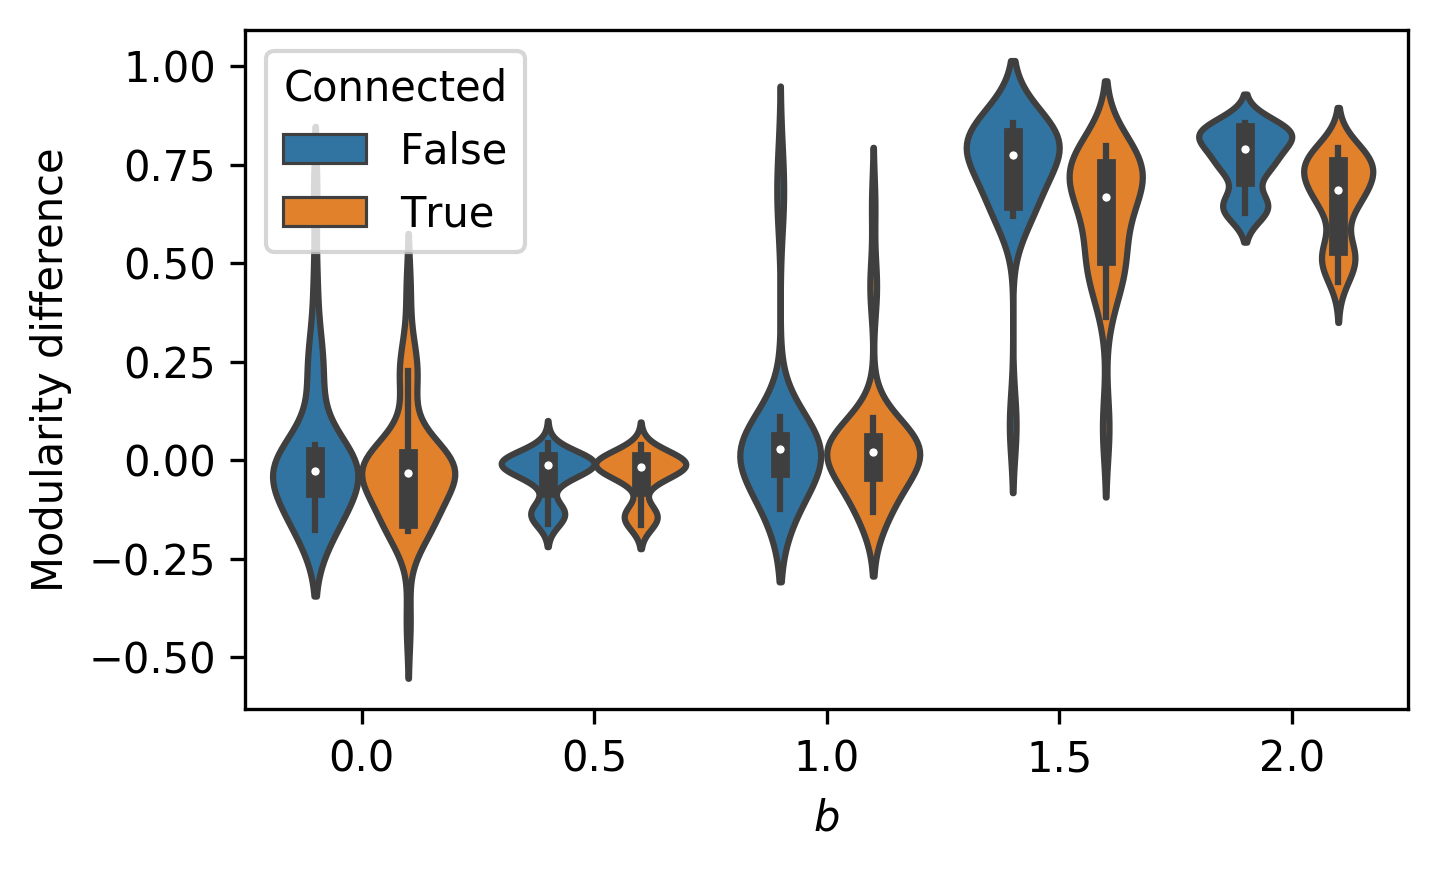

In [124]:
import seaborn as sns
plt.figure(figsize=(5, 3), dpi=300)
sns.violinplot(x='$b$', y='Modularity difference', 
               hue='Connected', data=mod_df)
plt.savefig('figures/mod_violin.pdf', transparent=True, bbox_inches='tight')

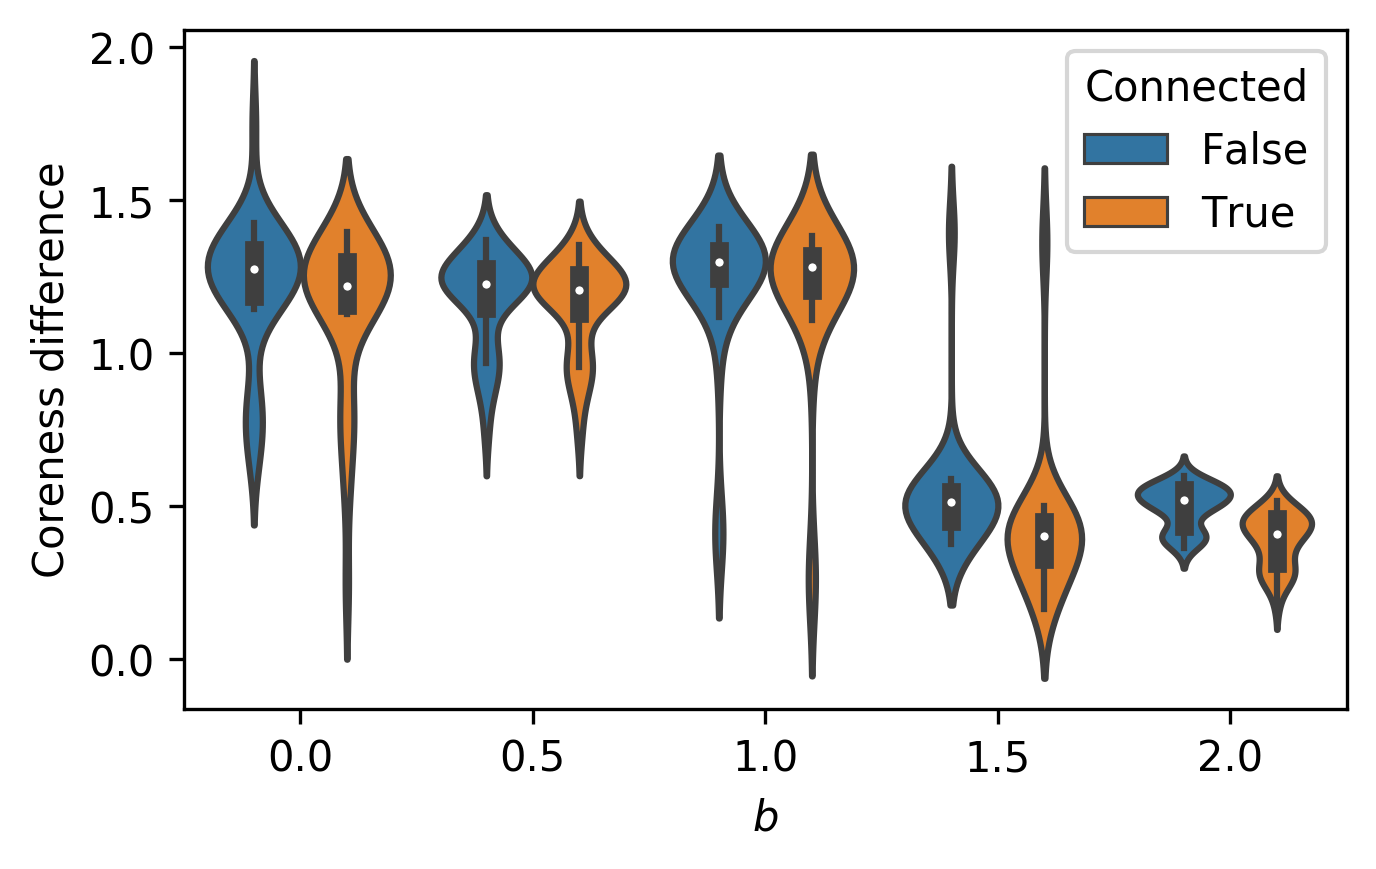

In [125]:
import pandas as pd

big_df = []
for i in range(core_peris.shape[0]):
    for j in range(core_peris.shape[1]):
        df = pd.DataFrame(
            {'Coreness difference': core_peris[i, j, :, 1] - core_peris[i, j, :, 0],
                           '$b$': b_vals[j],
                           'p': p_vals[i],
                           'Connected': False})
        big_df.append(df)
        df = pd.DataFrame(
            {'Coreness difference': core_peris_cc[i, j, :, 1] - core_peris_cc[i, j, :, 0],
                           '$b$': b_vals[j],
                           'p': p_vals[i],
                           'Connected': True})
        big_df.append(df)
core_peri_df = pd.concat(big_df)
import seaborn as sns
plt.figure(figsize=(5, 3), dpi=300)
sns.violinplot(x='$b$', y='Coreness difference', 
               hue='Connected', data=core_peri_df)
plt.savefig('figures/coreperi_violin.pdf', transparent=True, bbox_inches='tight')

In [153]:
p_vals[2], b_vals[4]

(0.1, 2.0)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


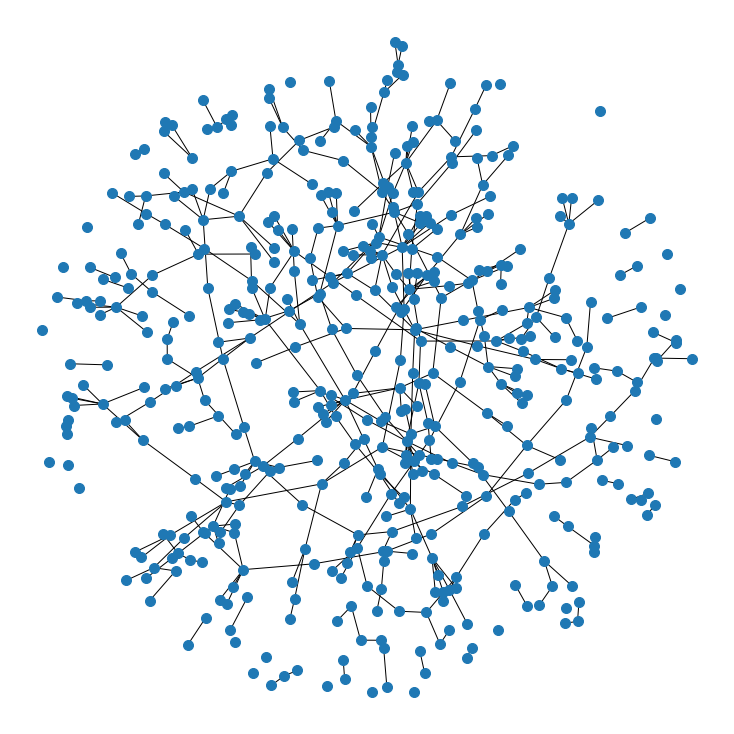

In [68]:
Gtest = np.load('p_{}_b_{}_dev_Gs.npy'.format(p_vals[2], b_vals[4]))
Gtest[0, 1]
plt.figure(figsize=(10, 10))
nx.draw(nx.from_numpy_array(Gtest[0, 1]), node_size=100)

In [81]:
avg_density = np.zeros((4, 5))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        densities = []
        for k in range(10):
            G = nx.from_numpy_array(dev_Gs[k, 1])
            densities.append(nx.density(G))
        avg_density[i, j] = np.mean(densities)

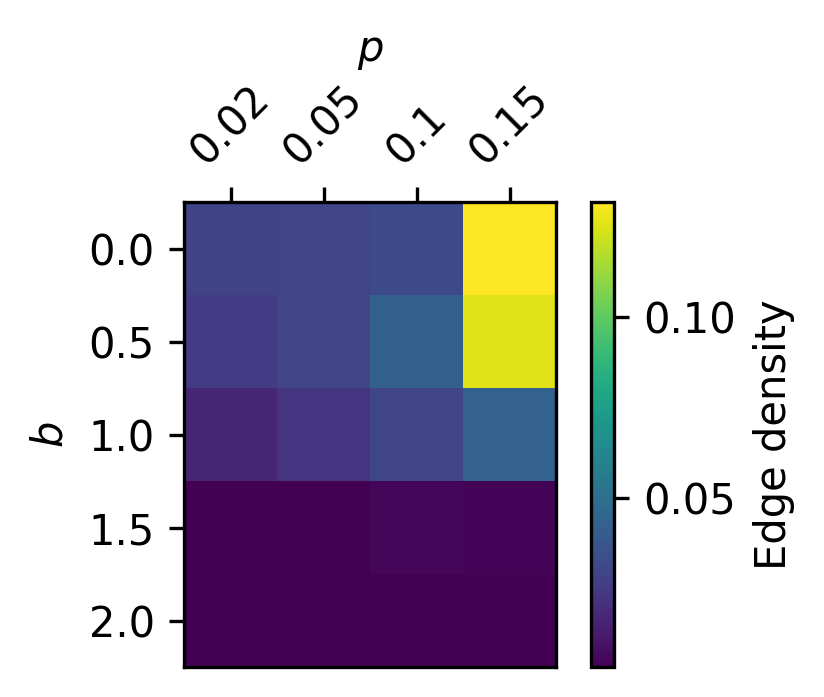

In [126]:
plt.figure(figsize=(3, 2), dpi=300)
plt.matshow(avg_density.T, fignum=1)
cb = plt.colorbar()
cb.set_label('Edge density')
ax = plt.gca()
ax.set_yticklabels([''] + list(b_vals))
plt.xlabel('$p$')
plt.xticks(rotation=45)
ax.set_xticklabels([''] + list(p_vals))
plt.ylabel('$b$')
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.savefig('figures/density.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [129]:
avg_coop = np.zeros((4, 5))
std_coop = np.zeros((4, 5))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        strats = np.load('p_{}_b_{}_strats.npy'.format(p, b))
        avg_coop[i, j] = np.mean(strats[:, -1, :, 0])
        std_coop[i, j] = np.std(np.mean(strats[:, -1, :, 0], axis=1))

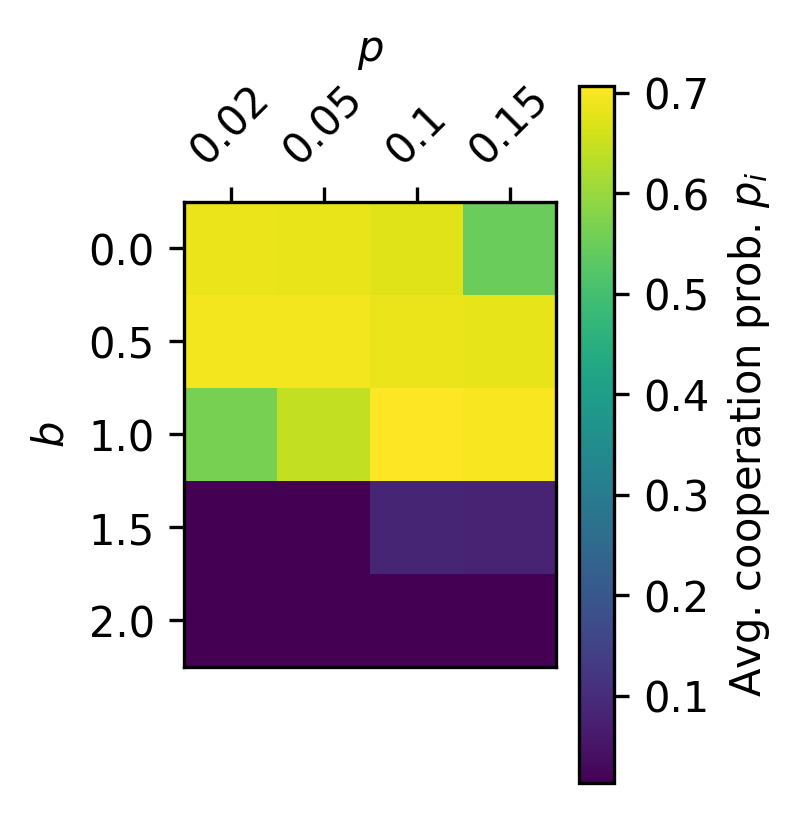

In [152]:
plt.figure(figsize=(2, 3), dpi=300)
plt.matshow(avg_coop.T, fignum=1)
cb = plt.colorbar()
cb.set_label('Avg. cooperation prob. $p_i$')
ax = plt.gca()
ax.set_yticklabels([''] + list(b_vals))
plt.xlabel('$p$')
plt.xticks(rotation=45)
ax.set_xticklabels([''] + list(p_vals))
plt.ylabel('$b$')
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.savefig('figures/avg_coop.pdf', transparent=True, bbox_inches='tight')
plt.show()

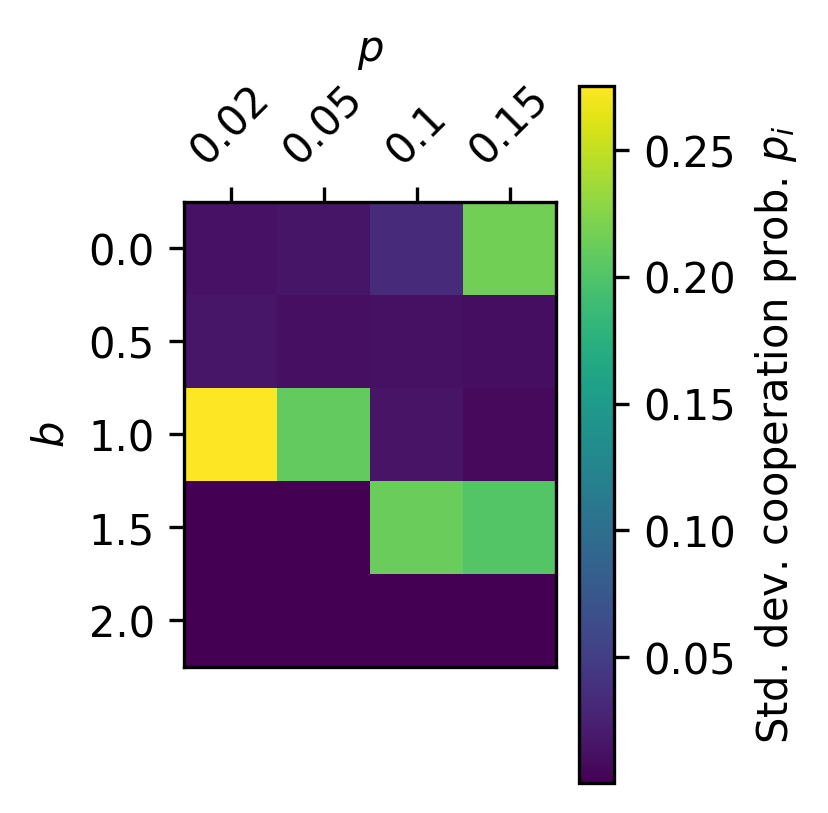

In [151]:
plt.figure(figsize=(2, 3), dpi=300)
plt.matshow(std_coop.T, fignum=1)
cb = plt.colorbar()
cb.set_label('Std. dev. cooperation prob. $p_i$')
ax = plt.gca()
ax.set_yticklabels([''] + list(b_vals))
plt.xlabel('$p$')
plt.xticks(rotation=45)
ax.set_xticklabels([''] + list(p_vals))
plt.ylabel('$b$')
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.savefig('figures/std_coop.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [137]:
avg_shortest_paths = np.zeros((4, 5, 10, 2))
avg_clustering = np.zeros((4, 5, 10, 2))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        for k in range(dev_Gs.shape[0]):
            ER_G = nx.from_numpy_array(dev_Gs[k, 0])
            real_G = nx.from_numpy_array(dev_Gs[k, 1])
            Gc = max(nx.connected_component_subgraphs(real_G), key=len)
            ERc = max(nx.connected_component_subgraphs(ER_G), key=len)
            avg_clustering[i, j, k, 0] = nx.average_clustering(ERc)
            avg_clustering[i, j, k, 1] = nx.average_clustering(Gc)
            avg_shortest_paths[i, j, k, 0] = nx.average_shortest_path_length(ERc)
            avg_shortest_paths[i, j, k, 1] = nx.average_shortest_path_length(Gc)

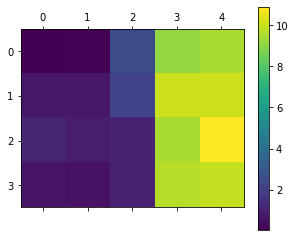

In [141]:
x = np.mean(avg_shortest_paths, axis=2)
plt.matshow(x[:,:,1] - x[:, :, 0])
plt.colorbar()

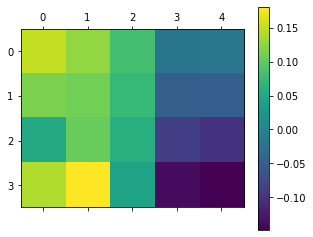

In [142]:
x = np.mean(avg_clustering, axis=2)
plt.matshow(x[:,:,1] - x[:, :, 0])
plt.colorbar()

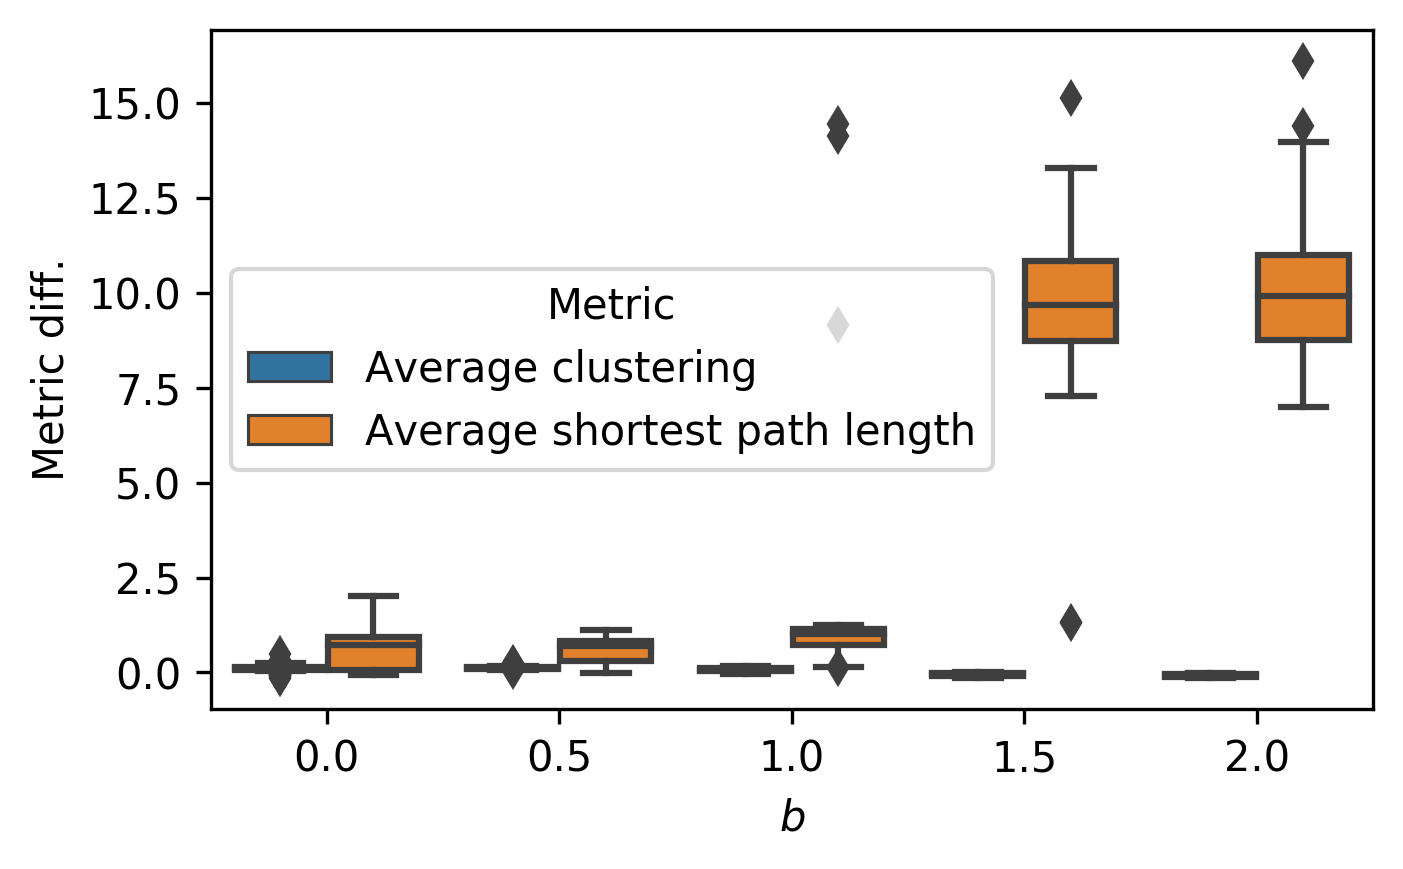

In [144]:
big_df = []
for i in range(avg_clustering.shape[0]):
    for j in range(core_peris.shape[1]):
        df = pd.DataFrame(
            {'Metric diff.': avg_clustering[i, j, :, 1] - avg_clustering[i, j, :, 0],
                           '$b$': b_vals[j],
                           'p': p_vals[i],
                           'Metric': 'Average clustering'})
        big_df.append(df)
        df = pd.DataFrame(
            {'Metric diff.': avg_shortest_paths[i, j, :, 1] - avg_shortest_paths[i, j, :, 0],
                           '$b$': b_vals[j],
                           'p': p_vals[i],
                           'Metric': 'Average shortest path length'})
        big_df.append(df)
core_peri_df = pd.concat(big_df)
import seaborn as sns
plt.figure(figsize=(5, 3), dpi=300)
sns.boxplot(x='$b$', y='Metric diff.', 
               hue='Metric', data=core_peri_df)

In [15]:
x = GraphEvo(300, 0.05, np.array([2., -0.5, 3, 0.5]))
x.mc_step_incr_edge(1, 0.1)

In [16]:
for _ in tqdm_notebook(range(1000000)):
    x.mc_step_incr_edge(1, 0.1)
C, m = community_louvain(x.G)
print(m)


0.17807250644089348


In [46]:
print(x.strategies)

[[0.01       0.01      ]
 [0.02434516 0.01      ]
 [0.031208   0.01      ]
 [0.01140511 0.01      ]
 [0.01477244 0.01      ]
 [0.02073322 0.01129743]
 [0.03974098 0.01      ]
 [0.03376976 0.01      ]
 [0.01707349 0.0176513 ]
 [0.03895975 0.04003796]
 [0.01       0.01      ]
 [0.01495401 0.05947784]
 [0.01902865 0.01      ]
 [0.1094726  0.01      ]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.01       0.01043818]
 [0.01987609 0.0209854 ]
 [0.01       0.01264223]
 [0.03439928 0.01      ]
 [0.01       0.01      ]
 [0.02526635 0.01      ]
 [0.01       0.01630854]
 [0.01       0.01      ]
 [0.01220194 0.01      ]
 [0.02179328 0.02689975]
 [0.01528815 0.01316357]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.0148144  0.01      ]
 [0.01430941 0.01      ]
 [0.01       0.01087433]
 [0.01230517 0.01      ]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.02191915 0.02130917]
 [0.01432521 0.01      ]
 [0.02764515 0.05957914]
 [0.01       0.01      ]
 [0.01       0.01      ]


In [49]:
print(x.strategies)

[[0.02573606 0.01      ]
 [0.01       0.01      ]
 [0.02690897 0.01      ]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.01       0.01003136]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.01       0.01101312]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.06070257 0.03531944]
 [0.01       0.01      ]
 [0.01992866 0.05188293]
 [0.01       0.01      ]
 [0.02251814 0.01      ]
 [0.01875772 0.01      ]
 [0.01       0.01      ]
 [0.01563974 0.03357238]
 [0.01       0.01      ]
 [0.02193709 0.01685622]
 [0.02619111 0.02038322]
 [0.01       0.01      ]
 [0.0356318  0.01      ]
 [0.03092391 0.01      ]
 [0.01       0.01      ]
 [0.02169134 0.01      ]
 [0.01       0.01      ]
 [0.01       0.01      ]
 [0.01753493 0.02137503]
 [0.01       0.02403855]
 [0.0171495  0.01      ]
 [0.01       0.01      ]
 [0.0132911  0.01      ]
 [0.01724528 0.01      ]
 [0.01       0.01      ]
 [0.02484364 0.01979054]
 [0.01058775 0.01      ]


In [8]:
import time
start = time.time()
dev_Gs, strategies = parallel_mc(300, 0.05, np.array([2., -1, 3, 0.]),
                                 1., 0.1, 5000000, 10)
end = time.time()
print(end - start)

copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
copy done
368.8823218345642


In [17]:
np.save('p_{}_b_{}_dev_Gs.npy'.format(0.02, 0.5), dev_Gs)

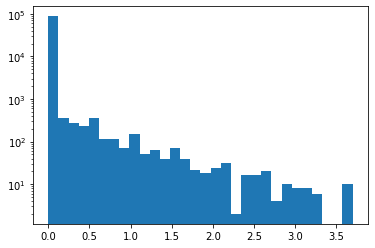

In [20]:
plt.hist(x.G.reshape(-1), bins=30)
plt.yscale('log')

In [531]:
graph, strats = x.run_mc(1, 0.1, 1000000)
C, m = community_louvain(x.G)
print(m)

0.9663977145152013


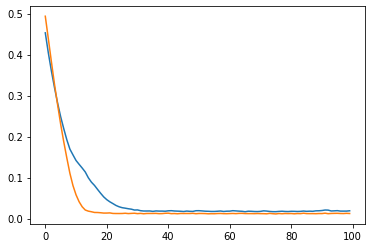

In [532]:
plt.plot(np.mean(strats, axis=1)[::10])

In [503]:
nx.density(G)

0.0036713426853707417

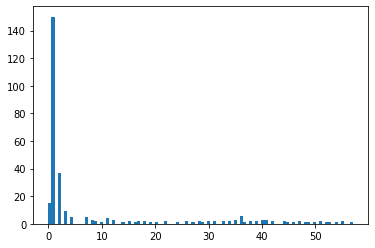

In [22]:
G = nx.from_numpy_array(x.G)
nx.density(G)
plt.hist(dict(G.degree()).values(), bins=100)
plt.show()

In [235]:
G.edges(data=True)

EdgeDataView([(0, 5, {'weight': 8.2}), (0, 7, {'weight': 2.1999999999999997}), (0, 39, {'weight': 1.9999999999999998}), (0, 42, {'weight': 11.099999999999998}), (0, 43, {'weight': 0.8}), (0, 48, {'weight': 2.1}), (0, 67, {'weight': 0.6000000000000001}), (0, 71, {'weight': 5.300000000000001}), (0, 77, {'weight': 0.6000000000000001}), (0, 81, {'weight': 0.8}), (0, 89, {'weight': 2.8000000000000003}), (0, 90, {'weight': 7.1}), (0, 100, {'weight': 8.699999999999998}), (0, 101, {'weight': 13.800000000000002}), (0, 103, {'weight': 13.799999999999994}), (0, 121, {'weight': 0.2}), (0, 123, {'weight': 0.4}), (0, 125, {'weight': 1.2}), (0, 130, {'weight': 0.8}), (0, 142, {'weight': 5.700000000000001}), (0, 144, {'weight': 5.2}), (0, 146, {'weight': 3.6000000000000014}), (0, 148, {'weight': 3.6000000000000014}), (0, 151, {'weight': 5.200000000000001}), (0, 157, {'weight': 4.6000000000000005}), (0, 160, {'weight': 15.299999999999992}), (0, 162, {'weight': 9.6}), (0, 163, {'weight': 1.4}), (0, 197,

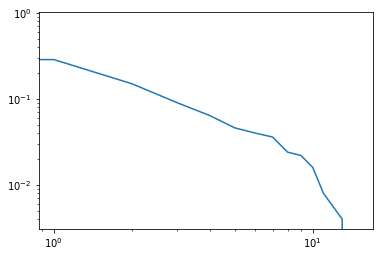

In [505]:
from collections import Counter
c = np.array(sorted(Counter(list(dict(G.degree()).values())).items()))
degs = c[:, 0]
counts = c[:, 1]
cdf = np.cumsum(counts)/np.sum(counts)
ccdf = 1-cdf
plt.loglog(degs, ccdf)


2.3541161129262482
2.0
-2.7139844773776387 0.019478200227529593


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


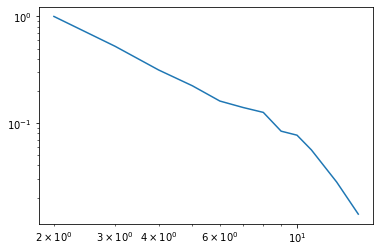

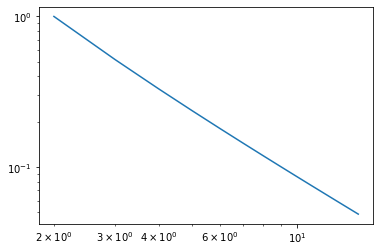

In [506]:
import powerlaw
results = powerlaw.Fit(list(dict(G.degree()).values()), 
                       discrete=True)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p)
results.plot_ccdf()
results.power_law.plot_ccdf()

In [168]:
from bct import community_louvain
print(community_louvain(x.G)[1])

0.3972444444444444


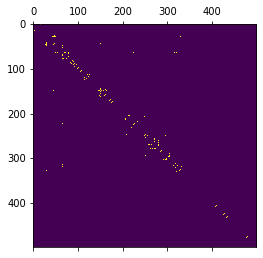

In [507]:
plt.matshow(x.G[:, np.argsort(C)][np.argsort(C), :])

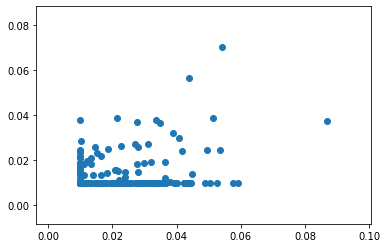

In [15]:
plt.scatter(x.strategies[:, 0], x.strategies[:, 1])

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


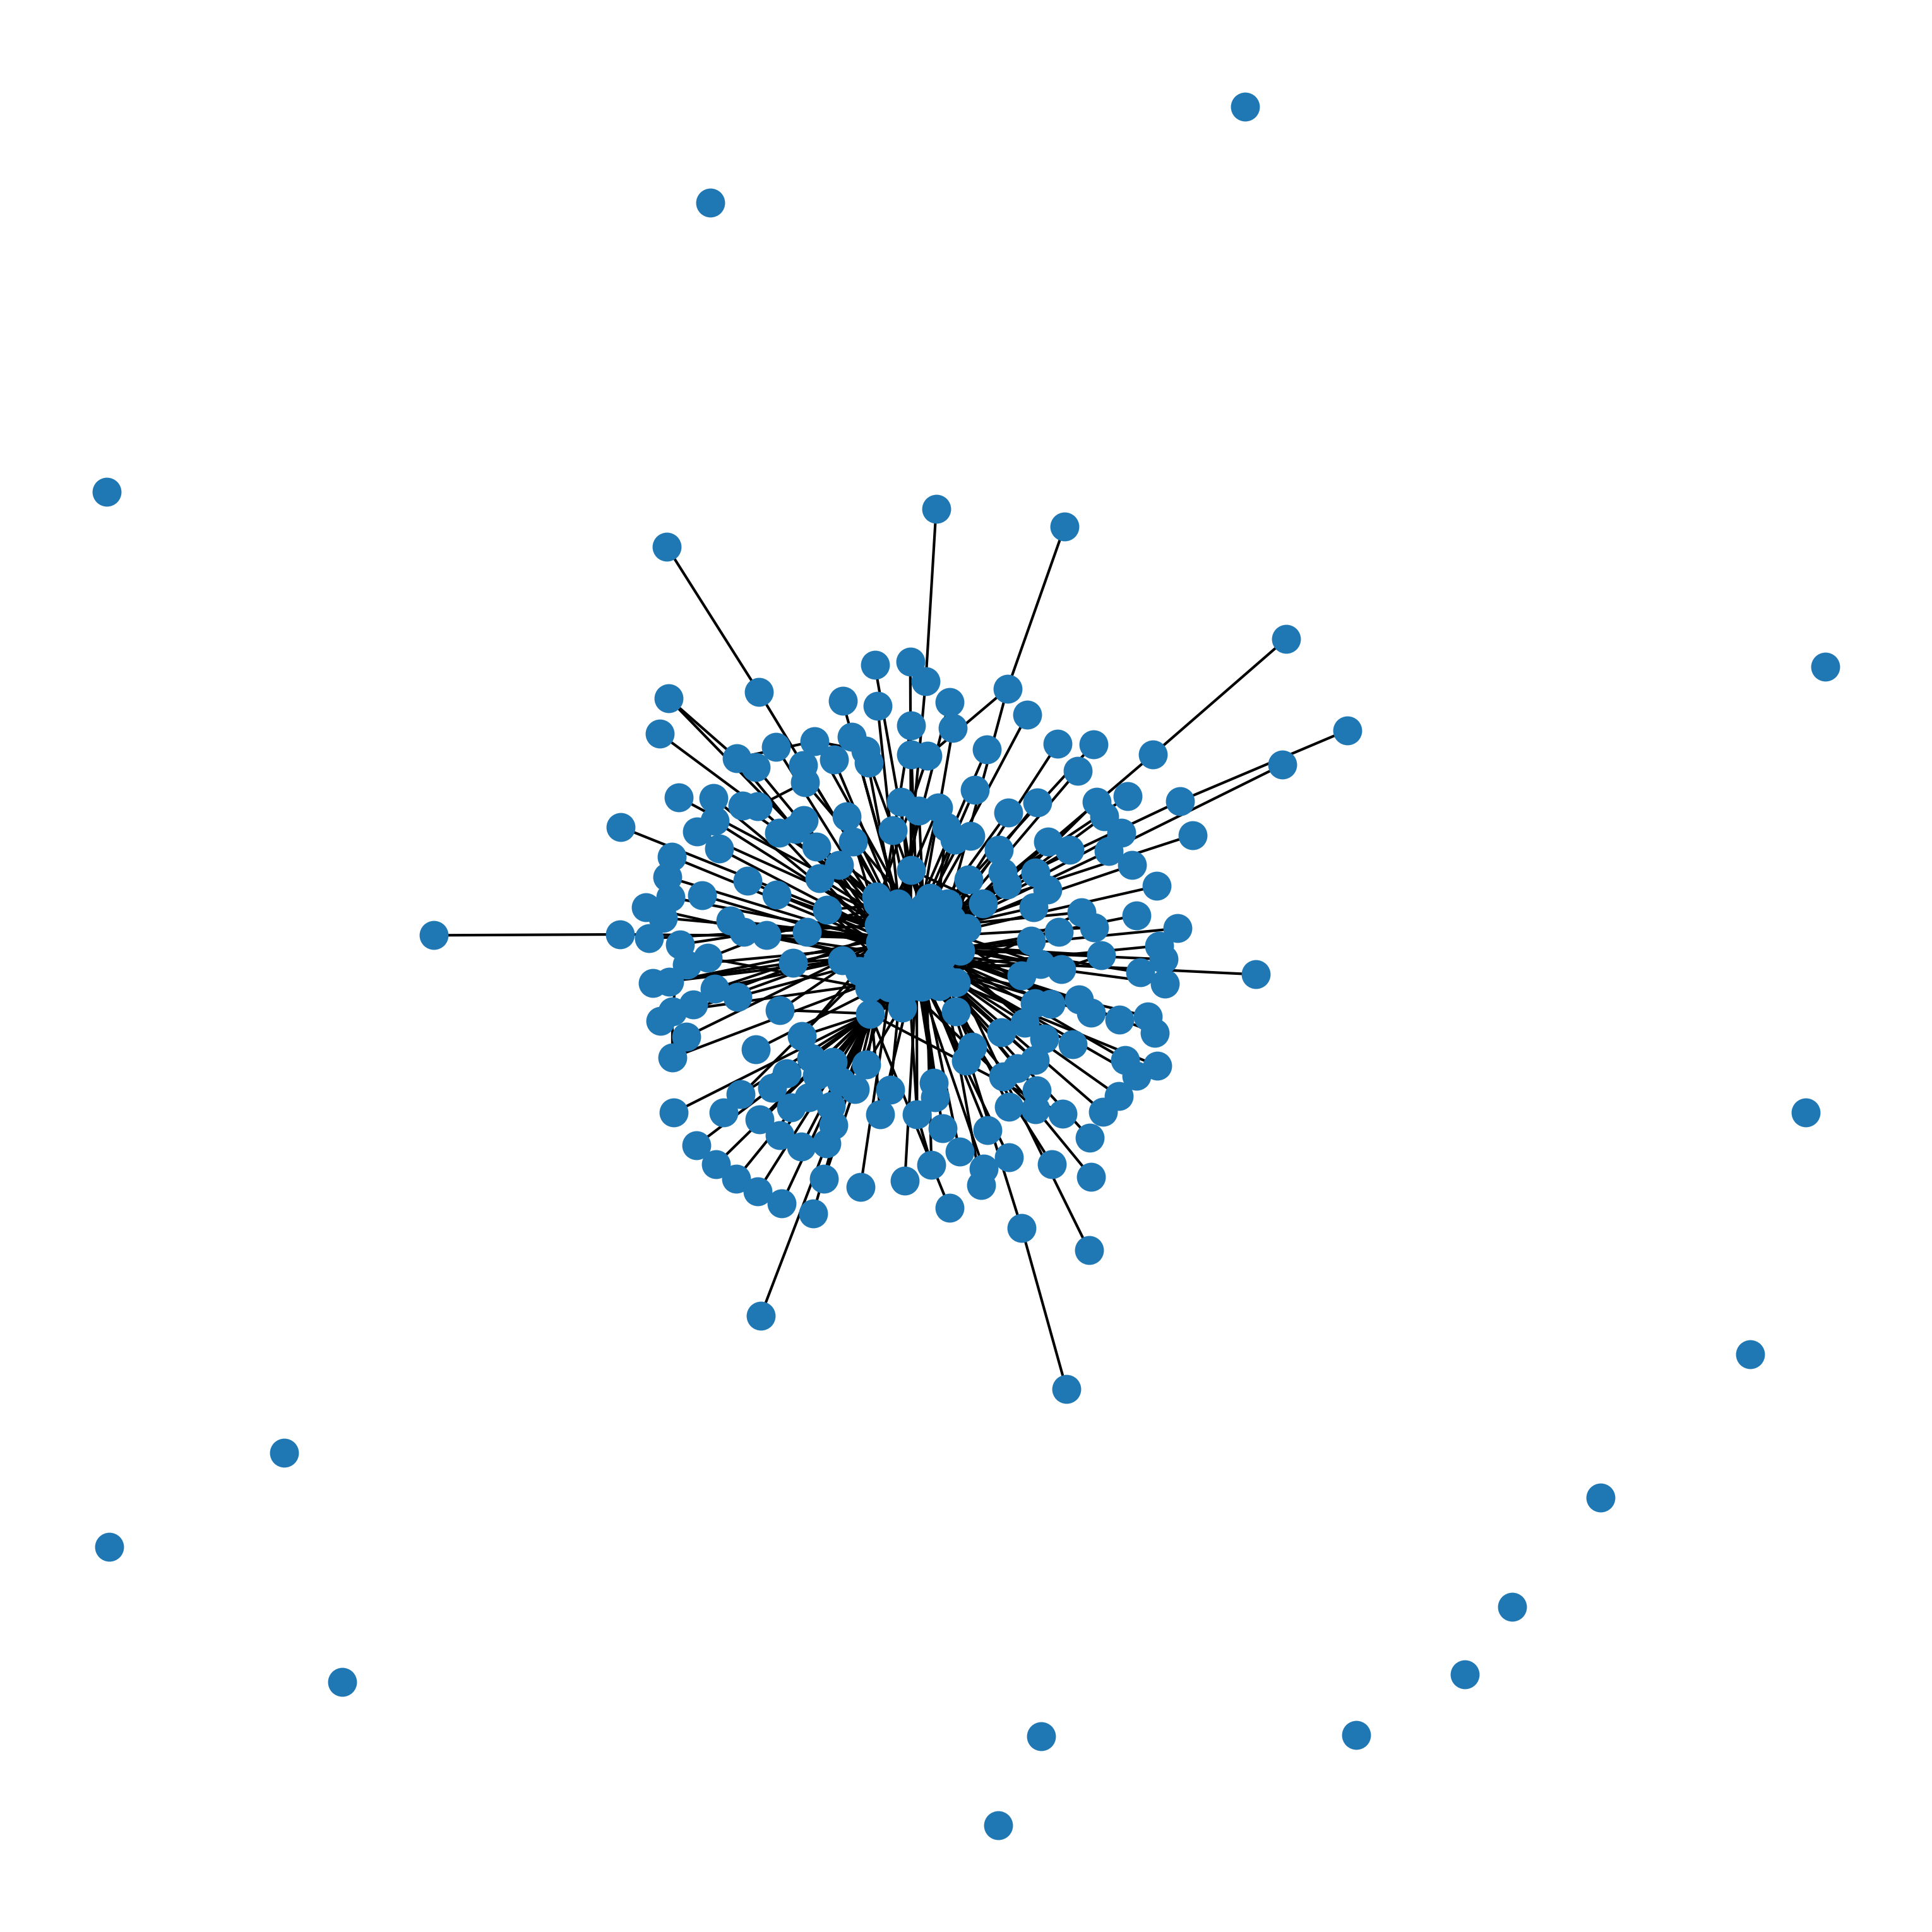

In [23]:
plt.figure(figsize=(10, 10), dpi=300)
nx.draw(G, node_size=100)